In [40]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

In [41]:
# Original DataFrame
print("Original DataFrame")
filedata = r"C:\\Users\\umay2\\Desktop\\SUFFER\\UNIV\\SEMESTER 2\\Metode Sains Data I\\PRAKTIKUM\\LAPRAK\\diamonds.csv"
data = pd.read_csv(filedata)
#pemisah ;
csv_path = filedata
df = pd.read_csv(csv_path, sep=';')
print("DataFrame with ';' separator")
print(df)

Original DataFrame
DataFrame with ';' separator
       carat  depth  table  price    quality
0       0.23   61.5   55.0    326      Ideal
1       0.21   59.8   61.0    326    Premium
2       0.23   56.9   65.0    327       Good
3       0.29   62.4   58.0    334    Premium
4       0.31   63.3   58.0    335       Good
...      ...    ...    ...    ...        ...
53935   0.72   60.8   57.0   2757      Ideal
53936   0.72   63.1   55.0   2757       Good
53937   0.70   62.8   60.0   2757  Very Good
53938   0.86   61.0   58.0   2757    Premium
53939   0.75   62.2   55.0   2757      Ideal

[53940 rows x 5 columns]


In [42]:
#preprocessing (membuat kolum baru untuk data quality menjadi ordinal (angka))
#ubah huruf dari kolum quality menjadi lowercase
df['quality_normalized'] = df['quality'].str.lower()
#Cek bila ada data yang kosong
print("Validasi tidak ada data yang kosong")
null= pd.isnull(df).sum()
print(null)
#korelasikan setiap variabel quality ke angka tertentu
quality_mapping =   {
    'premium': 5,
    'ideal': 4,
    'very good': 3,
    'good': 2,
    'fair': 1
}
#membuat kolum baru berdasarkan korelasi
df['quality_numeric'] = df['quality_normalized'].map(quality_mapping)
#drop kolum normaize karena ga dibutuhi lagi dan masukan kolum mapping ke df
df.drop(columns=['quality_normalized'], inplace=True)
print(df)

Validasi tidak ada data yang kosong
carat                 0
depth                 0
table                 0
price                 0
quality               0
quality_normalized    0
dtype: int64
       carat  depth  table  price    quality  quality_numeric
0       0.23   61.5   55.0    326      Ideal                4
1       0.21   59.8   61.0    326    Premium                5
2       0.23   56.9   65.0    327       Good                2
3       0.29   62.4   58.0    334    Premium                5
4       0.31   63.3   58.0    335       Good                2
...      ...    ...    ...    ...        ...              ...
53935   0.72   60.8   57.0   2757      Ideal                4
53936   0.72   63.1   55.0   2757       Good                2
53937   0.70   62.8   60.0   2757  Very Good                3
53938   0.86   61.0   58.0   2757    Premium                5
53939   0.75   62.2   55.0   2757      Ideal                4

[53940 rows x 6 columns]


In [43]:
## deskripsi dataframe numerik
print("deskripsi dataframe numerik:")
df_numerik = df.drop(columns=["quality"], axis=0)
maindata = df_numerik.describe()
print(maindata)

deskripsi dataframe numerik:
              carat         depth         table         price  quality_numeric
count  53940.000000  53940.000000  53940.000000  53940.000000     53940.000000
mean       0.797940     61.749405     57.457184   3932.799722         3.760234
std        0.474011      1.432621      2.234491   3989.439738         1.026956
min        0.200000     43.000000     43.000000    326.000000         1.000000
25%        0.400000     61.000000     56.000000    950.000000         3.000000
50%        0.700000     61.800000     57.000000   2401.000000         4.000000
75%        1.040000     62.500000     59.000000   5324.250000         5.000000
max        5.010000     79.000000     95.000000  18823.000000         5.000000


In [44]:
#definisikan variabel prediktor
pcollums = ['carat', 'depth', 'table', 'quality_numeric']
#ubah menjadi float
x = df[pcollums]
x.head(2)

,carat,depth,table,quality_numeric
0,0.23,61.5,55.0,4
1,0.21,59.8,61.0,5


In [45]:
#definisikan variabel respon
rcollums = ['price']
y= df[rcollums]
y.head(2)

,price
0,326
1,326


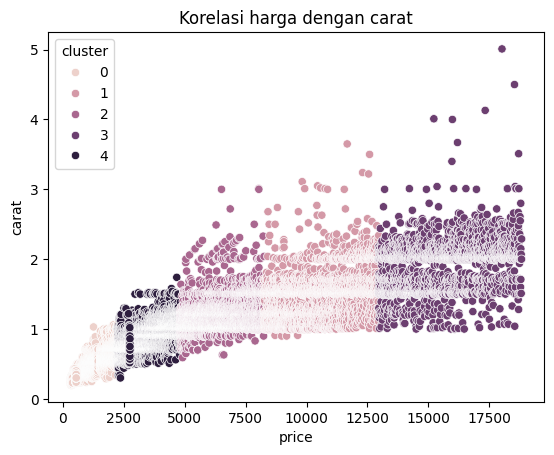

In [46]:
#partisi
X = df[['price', 'carat']]
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
df['cluster'] = y_kmeans

#scatterplot paritsi
sns.scatterplot(x='price', y='carat', hue='cluster', data=df)
plt.title('Korelasi harga dengan carat')
plt.xlabel('price')
plt.ylabel('carat')
plt.show()


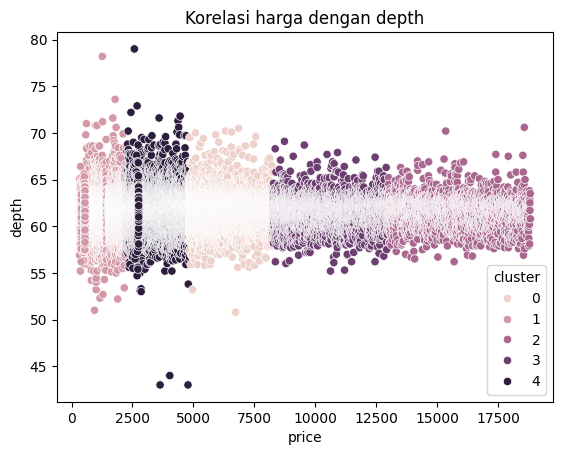

In [47]:
#partisi
X = df[['price', 'depth']]
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
df['cluster'] = y_kmeans

#scatterplot paritsi
sns.scatterplot(x='price', y='depth', hue='cluster', data=df)
plt.title('Korelasi harga dengan depth')
plt.xlabel('price')
plt.ylabel('depth')
plt.show()

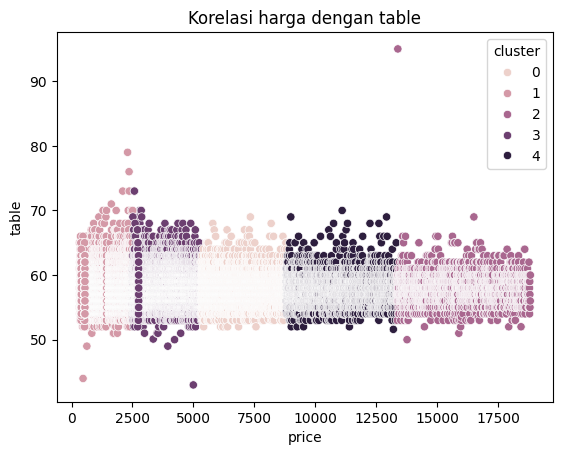

In [48]:
#partisi
X = df[['price', 'table']]
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
df['cluster'] = y_kmeans

#scatterplot paritsi
sns.scatterplot(x='price', y='table', hue='cluster', data=df)
plt.title('Korelasi harga dengan table')
plt.xlabel('price')
plt.ylabel('table')
plt.show()

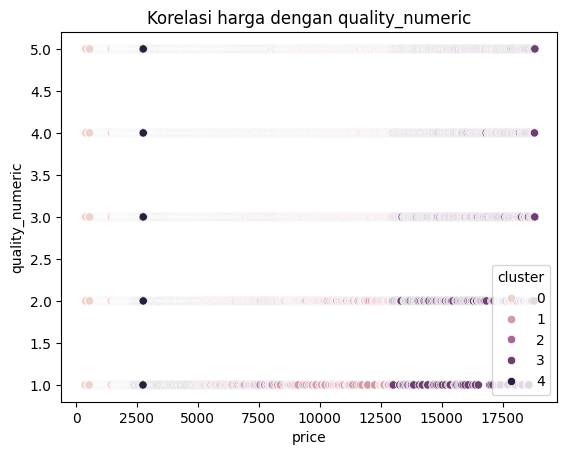

In [49]:
#partisi
X = df[['price', 'quality_numeric']]
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
df['cluster'] = y_kmeans

#scatterplot paritsi
sns.scatterplot(x='price', y='quality_numeric', hue='cluster', data=df)
plt.title('Korelasi harga dengan quality_numeric')
plt.xlabel('price')
plt.ylabel('quality_numeric')
plt.show()

In [50]:
#membagi prediktor dan variabel
X = df[pcollums]
y = df[rcollums]

#pembagian set data test dan training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#pembuatan model feedforward
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_dim=X_train.shape[1], activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
])

#kompilasi model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

#training model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

#evaluasi model
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")

Epoch 1/100


c:\Users\umay2\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1079/1079 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 15897563.0000 - mae: 2405.4407 - val_loss: 2225748.7500 - val_mae: 868.4825
Epoch 2/100
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2188855.2500 - mae: 867.8452 - val_loss: 2169319.7500 - val_mae: 870.6483
Epoch 3/100
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2199728.7500 - mae: 851.7767 - val_loss: 2119279.0000 - val_mae: 836.4562
Epoch 4/100
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2145026.7500 - mae: 830.1815 - val_loss: 2092928.8750 - val_mae: 828.2079
Epoch 5/100
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2125888.7500 - mae: 832.6609 - val_loss: 2080346.1250 - val_mae: 825.6474
Epoch 6/100
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2125119.0000 - mae: 830.4394 - val_loss: 2097944.0000 - val_mae: 853.1408
Epoch 7/100
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2034821.3750 - mae: 823.3716 - val_loss: 2082136.6250 - val_mae: 826.7441
Epoch 8/100
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/s

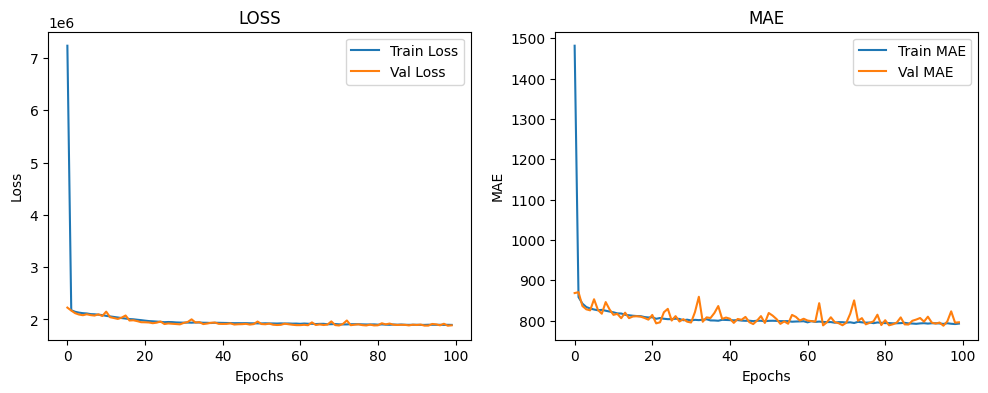

In [51]:
#Perbandingan training data dengan loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#Perbandingan training data dengan MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step


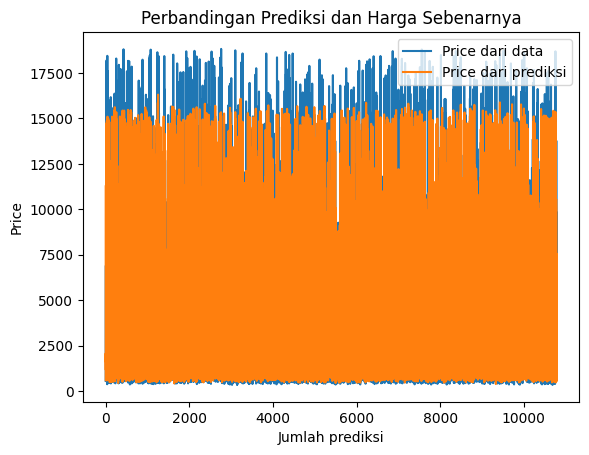

In [52]:
#perbandingan harga asli dengan prediksi
plt.plot(y_test.values, label='Price dari data')
plt.plot(model.predict(X_test_scaled), label='Price dari prediksi')
plt.xlabel('Jumlah prediksi')
plt.ylabel('Price')
plt.legend()
plt.title('Perbandingan Prediksi dan Harga Sebenarnya')
plt.show()

In [53]:
#penggambaran layer dan rumus setiap neuron dari layer tersebut
def display_neuron_equations(model, feature_names):
    for layer_idx, layer in enumerate(model.layers):
        weights, biases = layer.get_weights()
        print(f"\nLayer {layer_idx + 1} Neuron Equations:")
        for neuron_idx, (weight_vector, bias) in enumerate(zip(weights.T, biases)):
            equation = " + ".join(f"{weight:.4f}*{name}" for weight, name in zip(weight_vector, feature_names))
            equation = f"price prediction from neuron {neuron_idx}: {equation} + {bias:.4f}"
            print(equation)
feature_names = df[pcollums].columns.tolist()
display_neuron_equations(model, feature_names)


Layer 1 Neuron Equations:
price prediction from neuron 0: 0.7735*carat + -0.0041*depth + -0.0143*table + -0.0322*quality_numeric + 0.0548
price prediction from neuron 1: 0.0252*carat + -0.2834*depth + 0.6142*table + -0.3882*quality_numeric + 0.9516
price prediction from neuron 2: 0.7060*carat + 0.0082*depth + -0.0715*table + -0.0143*quality_numeric + 0.1332
price prediction from neuron 3: 0.3633*carat + 0.2850*depth + -0.2979*table + -0.7619*quality_numeric + 0.4341
price prediction from neuron 4: -0.0587*carat + 0.1250*depth + -0.0991*table + 0.2132*quality_numeric + 1.5360
price prediction from neuron 5: 0.3435*carat + 0.0057*depth + 0.0870*table + -0.3138*quality_numeric + 0.6865
price prediction from neuron 6: 0.3404*carat + -0.0491*depth + 0.1210*table + -0.2875*quality_numeric + 0.6604
price prediction from neuron 7: 0.3999*carat + 0.0566*depth + 0.0495*table + -0.1936*quality_numeric + 0.6391
price prediction from neuron 8: 0.1631*carat + -0.3306*depth + -0.1890*table + -0.0850